# Modul 2 - Quantenzustände und Lineare Algebra I

Eine Schulungsserie der Meetup-Gruppe **[Quantum Computing meets Business - Rhineland](https://www.meetup.com/de-DE/Quantum-Computing-meets-Business-Rhineland/)**


Themen:
- Quantenzustände
- Lineare Algebra I

In [40]:
%run ./00-Inhalt_Tools.ipynb

## Quantenzustände

Sie wissen jetzt etwas über Bits und darüber, wie unsere vertrauten digitalen Computer funktionieren.
All die komplexen Variablen, Objekte und Datenstrukturen, die in moderner Software verwendet werden, sind im Grunde alle nur große Haufen von Bits.
Diejenigen von uns, die sich mit Quantencomputern beschäftigen, nennen diese klassische Variablen. 
Die Computer, die sie verwenden, wie der, den Sie zum Lesen dieses Artikels benutzen, nennen wir klassische Computer.

In Quantencomputern ist unsere grundlegende Variable das Qubit: eine Quantenvariante des Bits.
Diese haben genau die gleichen Einschränkungen wie normale Bits: Sie können nur eine einzige binäre Information speichern und können immer nur eine 0 oder 1 ausgeben.
Allerdings können sie auch auf eine Weise manipuliert werden, die nur durch die Quantenmechanik beschrieben werden kann. 
Dies gibt uns neue Gatter, mit denen wir spielen können und die es uns ermöglichen, neue Wege zu finden, Algorithmen zu entwerfen.

Um diese neuen Gatter vollständig zu verstehen, müssen wir zunächst verstehen, wie man Qubit-Zustände aufschreibt.
Hierfür werden wir die Mathematik der Vektoren, Matrizen und komplexen Zahlen verwenden.
Obwohl wir diese Konzepte nach und nach einführen werden, wäre es am besten, wenn Sie bereits mit ihnen vertraut sind. 
Wenn Sie eine tiefer gehende Erklärung oder eine Auffrischung benötigen, finden Sie den Leitfaden hier.

**Inhalt**

1. [Klassisch vs. Quantenbits](#cvsq)     
    1.1 [Zustandsvektoren](#statevectors)      
    1.2 [Qubit-Notation](#Notation)    
    1.3 [Qubits mit Qiskit erforschen](#exploring-qubits)    
2. [Die Regeln der Messung](#rules-measurement)    
    2.1 [Eine sehr wichtige Regel](#important-rule)    
    2.2 [Die Implikationen dieser Regel](#implications)
3. [Die Bloch-Sphäre](#bloch-sphere)    
    3.1 [Beschreiben des eingeschränkten Qubit-Zustands](#bloch-sphere-1)     
    3.2 [Visuelle Darstellung eines Qubit-Zustands](#bloch-sphere-2)     

## 1. Klassisch vs. Quantenbits <a id="cvsq"></a>

### 1.1 Zustandsvektoren<a id="statevectors"></a>

In der Quantenphysik benutzen wir _Zustandsvektoren_, um den Zustand unseres Systems zu beschreiben. 
Angenommen, wir wollen die Position eines Autos entlang einer Bahn beschreiben, so ist dies ein klassisches System, also könnten wir eine Zahl $x$ verwenden:

<float>
    <center>
        <img src="../assets/02-Quantenzustaende_LineareAlgebraI/car_track_1.jpg" style="width:800px"/>
        <figcaption>
            Verfolgung eines Autos mit Skalaren
        </figcaption>
    </center>
</float>

$$ x=4 $$

Alternativ könnten wir stattdessen eine Sammlung von Zahlen in einem Vektor verwenden, der _Zustandsvektor_ genannt wird. 
Jedes Element im Zustandsvektor enthält die Wahrscheinlichkeit, das Auto an einem bestimmten Ort zu finden:

<float>
    <center>
        <img src="../assets/02-Quantenzustaende_LineareAlgebraI/car_track_2.jpg" style="width:800px"/>
        <figcaption>
            Verfolgung eines Autos mit Vektoren
        </figcaption>
    </center>
</float>

$$
    |x\rangle = \begin{bmatrix} 0 \\ \vdots \\ 0 \\ 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} 
                \begin{matrix} \\  \\  \\ \leftarrow \\ \\  \\  \\ \end{matrix}
                \begin{matrix} \\  \\ 
                    \text{Wahrscheinlichkeit, dass} \\ 
                    \text{Auto ist bei} \\ \\ 
                    \text{Position 4} \\ \\  \\ 
                \end{matrix}   
$$

Dies ist nicht auf die Position beschränkt, wir könnten auch einen Zustandsvektor mit allen möglichen Geschwindigkeiten, die das Auto haben könnte, und allen möglichen Farben, die das Auto haben könnte, aufbewahren.
Bei klassischen Systemen (wie dem obigen Auto-Beispiel) ist das eine dumme Sache, da man dafür riesige Vektoren behalten muss, wenn man eigentlich nur eine Zahl braucht. 
Aber wie wir in diesem Kapitel sehen werden, sind Zustandsvektoren zufällig ein sehr guter Weg, um Quantensysteme, einschließlich Quantencomputer, im Auge zu behalten.

### 1.2 Qubit-Notation <a id="notation"></a>

Klassische Bits haben immer einen vollständig wohldefinierten Zustand: Sie sind zu jedem Zeitpunkt während einer Berechnung entweder `0` oder `1`. 
Es gibt kein weiteres Detail, das wir dem Zustand eines Bits hinzufügen können als dies. 
Um also den Zustand eines klassischen Bits (`c`) aufzuschreiben, können wir einfach diese beiden Binärwerte verwenden. Zum Beispiel:

$$c = 0$$

Diese Einschränkung ist für Quantenbits aufgehoben.
Ob wir eine `0` oder eine `1` von einem Qubit erhalten, muss nur dann wohldefiniert sein, wenn eine Messung durchgeführt wird, um eine Ausgabe zu erhalten.
Zu diesem Zeitpunkt muss es sich auf eine der beiden Optionen festlegen.
Zu allen anderen Zeiten wird sein Zustand etwas Komplexeres sein, als durch einen einfachen Binärwert erfasst werden kann.

Um zu sehen, wie man diese beschreiben kann, können wir uns zunächst auf die beiden einfachsten Fälle konzentrieren. 
Wie wir im letzten Abschnitt gesehen haben, ist es möglich, ein Qubit in einem Zustand zu präparieren, bei dem es definitiv das Ergebnis `0` liefert, wenn es gemessen wird.

Wir brauchen einen Namen für diesen Zustand.
Seien wir phantasielos und nennen ihn $0$.
In ähnlicher Weise gibt es einen Qubit-Zustand, der mit Sicherheit eine `1` ausgibt.
Nennen wir diesen $1$. Diese beiden Zustände schließen sich gegenseitig völlig aus.
Entweder gibt das Qubit definitiv eine ```0``` aus, oder es gibt definitiv eine ```1``` aus.
Es gibt keine Überschneidung. 
Eine Möglichkeit, dies mathematisch darzustellen, ist die Verwendung zweier orthogonaler Vektoren.

$$ |0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \, \, \, \, |1\rangle =\begin{bmatrix} 0 \\ 1 \end{bmatrix}. $$

Das ist eine Menge Notation, die man auf einmal verinnerlichen muss.
Lassen Sie uns zunächst die seltsamen $|$ und $\rangle$ auspacken.
Ihre Aufgabe ist im Wesentlichen nur, uns daran zu erinnern, dass wir über die Vektoren sprechen, die Qubit-Zustände mit den Bezeichnungen $0$ und $1$ darstellen.
Das hilft uns, sie von Dingen wie den Bit-Werten ```0``` und ```1``` oder den Zahlen 0 und 1 zu unterscheiden.
Es ist Teil der von Dirac eingeführten Bra-Ket-Notation.

Wenn Sie mit Vektoren nicht vertraut sind, können Sie sich diese im Grunde nur als Listen von Zahlen vorstellen, die wir nach bestimmten Regeln manipulieren. 
Wenn Sie mit Vektoren aus dem Physikunterricht in der Schule vertraut sind, werden Sie wissen, dass Vektoren aufgrund dieser Regeln gut geeignet sind, um Größen mit einem Betrag und einer Richtung zu beschreiben.
Zum Beispiel wird die Geschwindigkeit eines Objekts perfekt mit einem Vektor beschrieben.
Die Art und Weise, wie wir Vektoren für Quantenzustände verwenden, ist jedoch etwas anders als diese, also halten Sie nicht zu sehr an Ihrer bisherigen Intuition fest.
Es ist an der Zeit, etwas Neues zu tun!

Mit Vektoren können wir komplexere Zustände als nur $|0\rangle$ und $|1\rangle$ beschreiben.
Betrachten Sie zum Beispiel den Vektor

$$ |q_0\rangle = \begin{bmatrix} \tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix}.$$

Um zu verstehen, was dieser Zustand bedeutet, müssen wir die mathematischen Regeln für die Manipulation von Vektoren anwenden.
Insbesondere müssen wir verstehen, wie man Vektoren addiert und wie man sie mit Skalaren multipliziert.

<p>
    <details>
    <summary>Reminder: Matrixaddition und Multiplikation mit Skalaren (Klick hier für Vergrößerung)</summary>
    <p>
        Um zwei Vektoren zu addieren, addieren wir ihre Elemente zusammen:
        $$ 
            |a\rangle = \begin{bmatrix}a_0 \\ a_1 \\ \vdots \\ a_n \end{bmatrix}, \quad
            |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}
        $$
        $$ |a\rangle + |b\rangle = \begin{bmatrix}a_0 + b_0 \\ a_1 + b_1 \\ \vdots \\ a_n + b_n \end{bmatrix} $$
    </p>
    <p>
        Und um einen Vektor mit einem Skalar zu multiplizieren, multiplizieren wir jedes Element mit dem Skalar:
        $$ x|a\rangle = \begin{bmatrix}x \times a_0 \\ x \times  a_1 \\ \vdots \\ x \times  a_n \end{bmatrix} $$
    </p>
    <p>
        Mit diesen beiden Regeln lässt sich der Vektor $|q_0\rangle$ (wie oben gezeigt) umschreiben:
        $$
        \begin{aligned} 
            |q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \\
                        & = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1\\0\end{bmatrix} + 
                            \tfrac{i}{\sqrt{2}}\begin{bmatrix}0\\1\end{bmatrix}\\
                        & = \begin{bmatrix}\tfrac{1}{\sqrt{2}}\\0\end{bmatrix} + 
                            \begin{bmatrix}0\\\tfrac{i}{\sqrt{2}}\end{bmatrix}\\
                        & = \begin{bmatrix}\tfrac{1}{\sqrt{2}} \\ \tfrac{i}{\sqrt{2}} \end{bmatrix}\\
        \end{aligned}
        $$
    </details>
</p>
<p>
    <details>
    <summary>
        Erinnerung: Orthonormalbasen (Klicken Sie hier, um zu erweitern)
    </summary>
    <p>
        Es wurde bereits gesagt, dass die beiden Vektoren $|0\rangle$ und $|1\rangle$ orthonormal sind, das heißt, sie sind beide <i>orthogonal</i> und <i>normalisiert</i>. Orthogonal bedeutet, dass die Vektoren im rechten Winkel zueinander stehen:
    </p>
    <p>
        <img src="../assets/02-Quantenzustaende_LineareAlgebraI/basis.svg">
    </p>
    <p>
        Und normalisiert bedeutet, dass ihre Beträge (Länge des Pfeils) gleich 1 sind. 
        Die beiden Vektoren $|0\rangle$ und $|1\rangle$ sind <i>linear unabhängig</i>, das heißt, wir können $|0\rangle$ nicht durch $|1\rangle$ beschreiben und umgekehrt. 
        Mit Hilfe der beiden Vektoren $|0\rangle$ und $|1\rangle$ und unseren Regeln der Addition und Multiplikation mit Skalaren können wir jedoch alle möglichen Vektoren im 2D-Raum beschreiben:
    </p>
    <p>
        <img src="../assets/02-Quantenzustaende_LineareAlgebraI/basis2.svg">
    </p>
    <p>
        Da die Vektoren $|0\rangle$ und $|1\rangle$ linear unabhängig sind und mit Hilfe von Vektoraddition und Skalarmultiplikation jeden beliebigen Vektor im 2D-Raum beschreiben können, sagen wir, die Vektoren $|0\rangle$ und $|1\rangle$ bilden eine <i>Basis</i>. 
        Da sie in diesem Fall beide orthogonal und normalisiert sind, nennen wir sie eine <i>orthonormale Basis</i>.
    </details>
</p>

Da die Zustände $|0\rangle$ und $|1\rangle$ eine orthonormale Basis bilden, können wir jeden 2D-Vektor mit einer Kombination aus diesen beiden Zuständen darstellen. 
Dies erlaubt uns, den Zustand unseres Qubits in der alternativen Form zu schreiben:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

Dieser Vektor, $|q_0\rangle$, wird der Zustandsvektor des Qubits genannt, er sagt uns alles, was wir über dieses Qubit wissen können. 
Im Moment können wir nur ein paar einfache Schlüsse über dieses spezielle Beispiel eines Zustandsvektors ziehen: Er ist nicht ganz $|0\rangle$ und nicht ganz $|1\rangle$.
Stattdessen wird er durch eine Linearkombination aus beiden beschrieben. 
In der Quantenmechanik beschreiben wir solche Linearkombinationen typischerweise mit dem Wort "Superposition".

Obwohl unser Beispielzustand $|q_0\rangle$ als eine Superposition von $|0\rangle$ und $|1\rangle$ ausgedrückt werden kann, ist er nicht weniger ein eindeutiger und wohldefinierter Qubit-Zustand als diese.
Um dies zu sehen, können wir beginnen zu erforschen, wie ein Qubit manipuliert werden kann.

### 1.3 Qubits mit Qiskit erforschen <a id="exploring-qubits"></a>

Zuerst müssen wir alle Werkzeuge importieren, die wir benötigen:

In [41]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In Qiskit verwenden wir das Objekt `QuantumCircuit`, um unsere Schaltungen zu speichern.
Dies ist im Wesentlichen eine Liste der Quantenoperationen auf unserer Schaltung und der Qubits, auf welche die angewendet werden.

In [42]:
qc = QuantumCircuit(1) # Erstellen einer Quantenschaltung mit einem Qubit

In unseren Quantenschaltungen beginnen unsere Qubits immer mit dem Zustand $|0\rangle$.
Mit der Methode `initialize()` können wir diesen in einen beliebigen Zustand überführen. 
Wir geben `initialize()` den gewünschten Vektor in Form einer Liste und sagen ihm, welche(s) Qubit(s) wir in diesem Zustand initialisieren wollen:

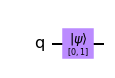

In [43]:
qc = QuantumCircuit(1) # Erzeugen einer Quantenschaltung mit einem Qubit
initial_state = [0,1] # Definieren Sie initial_state als |1>
qc.initialize(initial_state, 0) # Initialisierungs-Operation auf das 0te Qubit anwenden
qc.draw("mpl") # Lassen Sie uns unsere Schaltung betrachten

Wir können dann einen der Simulatoren von Qiskit verwenden, um den resultierenden Zustand unseres Qubits zu betrachten. 
Für den Anfang werden wir den Zustandsvektor-Simulator verwenden, aber wir werden die verschiedenen Simulatoren und ihre Verwendung später erklären.

In [44]:
backend = Aer.get_backend('statevector_simulator') # Qiskit mitteilen, wie unsere Schaltung simuliert werden soll

Um die Ergebnisse unserer Schaltung zu erhalten, verwenden wir `execute`, um unsere Schaltung auszuführen, wobei wir die Schaltung und das Backend als Argumente angeben. 
Wir verwenden dann `.result()`, um das Ergebnis zu erhalten:

In [45]:
qc = QuantumCircuit(1) # Erzeugen einer Quantenschaltung mit einem Qubit
initial_state = [0,1] # Definieren Sie initial_state als |1>
qc.initialize(initial_state, 0) # Initialisierungsoperation auf das 0. Qubit anwenden
result = execute(qc,backend).result() # Führt die Simulation durch und gibt das Ergebnis zurück

von `result`, können wir dann den endgültigen Zustandsvektor mit `.get_statevector()` erhalten:

In [46]:
qc = QuantumCircuit(1) # Erzeugen einer Quantenschaltung mit einem Qubit
initial_state = [0,1] # Definieren Sie initial_state als |1>
qc.initialize(initial_state, 0) # Initialisierungsoperation auf das 0. Qubit anwenden
result = execute(qc,backend).result() # Führt die Simulation durch und gibt das Ergebnis zurück
out_state = result.get_statevector()
print(out_state) # Den ausgegebenen Zustandsvektor anzeigen

[0.+0.j 1.+0.j]


**Hinweis:** \
Python verwendet `j` zur Darstellung von $i$ in komplexen Zahlen.
Wir sehen einen Vektor mit zwei komplexen Elementen: `0.+0.j` = 0, und `1.+0.j` = 1.

Lassen Sie uns nun unser Qubit wie in einem echten Quantencomputer messen und das Ergebnis sehen:

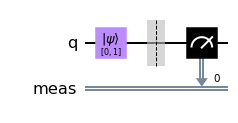

In [47]:
qc.measure_all()
qc.draw("mpl")

Diesmal erhalten wir anstelle des Zustandsvektors die Zählerstände für die Ergebnisse `0` und `1` mit `.get_counts()`:

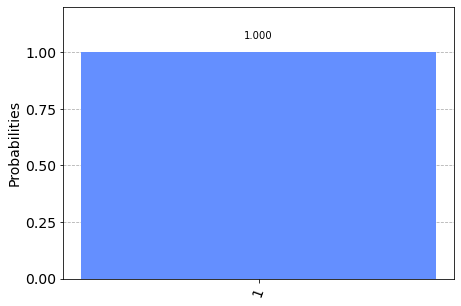

In [48]:
result = execute(qc,backend).result()
counts = result.get_counts()
plot_histogram(counts)

Wir können sehen, dass wir (wenig überraschend) eine 100%ige Chance haben, $|1\rangle$ zu messen.
Dieses Mal wollen wir stattdessen unser Qubit in eine Superposition bringen und sehen, was passiert.
Wir werden den Zustand $|q_0\rangle$ von früher in diesem Abschnitt verwenden:

$$ |q_0\rangle = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle $$

Wir müssen diese Amplituden zu einer Python-Liste hinzufügen. 
Um eine komplexe Amplitude hinzuzufügen, verwenden wir `complex` und geben den Real- und Imaginärteil als Argumente an:

In [49]:
initial_state = [1/sqrt(2), 1j/sqrt(2)] # Zustand definieren |q_0>

Und wir wiederholen dann die Schritte zur Initialisierung des Qubits wie zuvor:

In [50]:
qc = QuantumCircuit(1) # Muss qc redefinieren
qc.initialize(initial_state, 0) # Initialisiere das 0. Qubit im Zustand `initial_state`
state = execute(qc,backend).result().get_statevector() # Führt die Schaltung aus
print(state) # Das Ergebnis drucken

[0.70710678+0.j         0.        +0.70710678j]


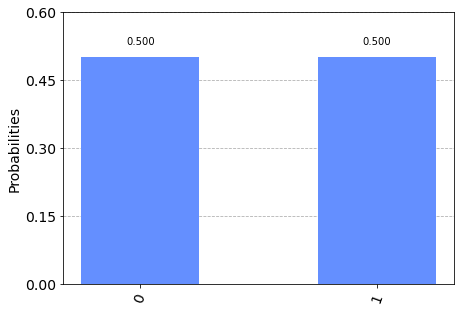

In [51]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

Wir können sehen, dass wir die gleiche Wahrscheinlichkeit haben, entweder $|0\rangle$ oder $|1\rangle$ zu messen.
Um dies zu erklären, müssen wir über die Messung sprechen.


## 2. Die Regeln des Messens <a id="regeln-zum-messen"></a>

### 2.1 Eine sehr wichtige Regel <a id="wichtig-regel"></a>

Für die Messung gibt es eine einfache Regel.
Um die Wahrscheinlichkeit zu finden, einen Zustand $|\psi \rangle$ im Zustand $|x\rangle$ zu messen, betrachten wir:

$$ p(|x\rangle) = | \langle x| \psi \rangle|^2 $$

Die Symbole $\langle$ und $|$ sagen uns, dass $\langle x |$ ein Zeilenvektor ist.
In der Quantenmechanik nennen wir die Spaltenvektoren _kets_ und die Zeilenvektoren _bras_.
Zusammen bilden sie die _bra-ket_-Notation.
Jedes Ket $|a\rangle$ hat eine entsprechende BH $\langle a|$, und wir konvertieren zwischen ihnen mit Hilfe der konjugierten Transponierung.

<details>
    <summary>
        Erinnerung: Das innere Produkt (Klicken Sie hier, um zu erweitern)
    </summary>
    <p>
        Es gibt verschiedene Möglichkeiten, Vektoren zu multiplizieren, hier verwenden wir das <i>innere Produkt</i>. 
        Das innere Produkt ist eine Verallgemeinerung des <i>Punktprodukts</i>, mit dem Sie vielleicht schon vertraut sind. 
        In dieser Anleitung verwenden wir das innere Produkt zwischen einem BH (Zeilenvektor) und einem Ket (Spaltenvektor), und es folgt dieser Regel:
        $$
            \langle a| = \begin{bmatrix}a_0^*, & a_1^*, & \dots & a_n^* \end{bmatrix}, \quad
            |b\rangle = \begin{bmatrix}b_0 \\ b_1 \\ \vdots \\ b_n \end{bmatrix}
        $$
        $$ \langle a|b\rangle = a_0^* b_0 + a_1^* b_1 \dots a_n^* b_n $$
    </p>
    <p>
        Wir sehen, dass das innere Produkt zweier Vektoren uns immer einen Skalar liefert. 
        Eine nützliche Sache, die man sich merken sollte, ist, dass das innere Produkt von zwei orthogonalen Vektoren 0 ist, wenn wir zum Beispiel die orthogonalen Vektoren $|0\rangle$ und $|1\rangle$ haben:
        
        $$\langle1|0\rangle = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = 0$$
    </p>
    <p>
        Zusätzlich ist zu beachten, dass die Vektoren $|0\rangle$ und $|1\rangle$ ebenfalls normiert sind (die Beträge sind gleich 1):
    
        $$
        \begin{aligned} 
            \langle 0|0\rangle & = \begin{bmatrix} 1 , & 0\end{bmatrix}\begin{bmatrix}1 \\\ 0\end{bmatrix} = 1 \\\
            \langle 1|1\rangle & = \begin{bmatrix} 0 , & 1\end{bmatrix}\begin{bmatrix}0 \\\ 1\end{bmatrix} = 1
        \end{aligned}
        $$
   </p>
</details>

In der obigen Gleichung kann $|x\rangle$ ein beliebiger Qubit-Zustand sein.
Um die Wahrscheinlichkeit der Messung von $|x\rangle$ zu finden, nehmen wir das innere Produkt von $|x\rangle$ und dem Zustand, den wir messen (in diesem Fall $|\psi\rangle$), und quadrieren dann den Betrag. 
Dies mag ein wenig umständlich erscheinen, aber es wird bald zur zweiten Natur werden.

Wenn wir uns den Zustand $|q_0\rangle$ von vorhin ansehen, sehen wir, dass die Wahrscheinlichkeit, $|0\rangle$ zu messen, tatsächlich $0,5$ ist:

$$
\begin{aligned}
    |q_0\rangle & = \tfrac{1}{\sqrt{2}}|0\rangle + \tfrac{i}{\sqrt{2}}|1\rangle \langle 0| q_0 \rangle  
                & = \tfrac{1}{\sqrt{2}} \langle 0|0\rangle + \tfrac{i}{\sqrt{2}} \langle 0|1\rangle \\
                & = \tfrac{1}{\sqrt{2}} \cdot 1 +  \tfrac{i}{\sqrt{2}} \cdot 0\\
                & = \tfrac{1}{\sqrt{2}} \langle 0| q_0 \rangle|^2 & = \tfrac{1}{2}
\end{aligned}
$$

Als Übung sollten Sie die Wahrscheinlichkeit der Messung von $|1\rangle$ nachweisen.

Diese Regel regelt, wie wir Informationen aus Quantenzuständen erhalten. 
Sie ist daher sehr wichtig für alles, was wir in der Quantenberechnung tun. 
Sie impliziert auch unmittelbar mehrere wichtige Fakten.

### 2.2 Die Implikationen dieser Regel <a id="implications"></a>
#### 1. Normalisierung

Die Regel zeigt uns, dass Amplituden mit Wahrscheinlichkeiten verbunden sind. Wenn wir wollen, dass die Wahrscheinlichkeiten sich zu 1 addieren (was sie sollten!), müssen wir sicherstellen, dass der Zustandsvektor richtig normalisiert ist. 
Genauer gesagt muss der Betrag des Zustandsvektors 1 sein.

$$ \langle\psi|\psi\rangle = 1 \\ $$

Dies erklärt die Faktoren von $\sqrt{2}$, die Sie im Laufe dieses Kapitels gesehen haben. 
Wenn wir versuchen, `initialize()` einen Vektor zu geben, der nicht normalisiert ist, wird es uns einen Fehler liefern:

In [52]:
vector = [1,1]
qc.initialize(vector, 0)

QiskitError: 'Sum of amplitudes-squared does not equal one.'

### Schnellübung

1. Erzeugen Sie einen Zustandsvektor, der eine $1/3$-Wahrscheinlichkeit für die Messung von $|0\rangle$ ergibt.
2. Erzeugen Sie einen anderen Zustandsvektor, der die gleichen Messwahrscheinlichkeiten ergibt.
3. Prüfen Sie, dass die Messwahrscheinlichkeit $|1\rangle$ für diese beiden Zustände $2/3$ beträgt.

In [53]:
# Starten Sie hier!

#### 2 Alternative Messung

Die Messregel gibt uns die Wahrscheinlichkeit $p(|x\rangle)$, dass ein Zustand $|\psi\rangle$ als $|x\rangle$ gemessen wird. 
Nirgends sagt sie uns, dass $|x\rangle$ nur entweder $|0\rangle$ oder $|1\rangle$ sein kann.

Die Messungen, die wir bisher betrachtet haben, sind in der Tat nur eine von unendlich vielen möglichen Arten, ein Qubit zu messen. 
Für jedes orthogonale Paar von Zuständen können wir eine Messung definieren, die ein Qubit dazu veranlasst, zwischen den beiden zu wählen.

Diese Möglichkeit wird im nächsten Abschnitt näher untersucht. 
Für den Moment sollten Sie sich einfach vor Augen halten, dass $|x\rangle$ nicht darauf beschränkt ist, einfach $|0\rangle$ oder $|1\rangle$ zu sein.

#### 3 Globale Phase

Wir wissen, dass die Messung des Zustands $|1\rangle$ uns mit Sicherheit den Ausgang `1` liefert. Wir sind aber auch in der Lage, Zustände aufzuschreiben wie 

$$\begin{bmatrix}0 \\\ i\end{bmatrix} = i|1\rangle.$$

Um zu sehen, wie sich das verhält, wenden wir die Messregel an.

$$ |\langle x| (i|1\rangle) |^2 = | i \langle x|1\rangle|^2 = |\langle x|1\rangle|^2 $$

Hier stellen wir fest, dass der Faktor von $i$ verschwindet, sobald wir den Betrag der komplexen Zahl nehmen. Dieser Effekt ist völlig unabhängig von dem gemessenen Zustand $|x\rangle$. Es spielt keine Rolle, welche Messung wir betrachten, die Wahrscheinlichkeiten für den Zustand $i|1\rangle$ sind identisch mit denen für $|1\rangle$. Da Messungen die einzige Möglichkeit sind, einem Qubit Informationen zu entlocken, impliziert dies, dass diese beiden Zustände in jeder physikalisch relevanten Hinsicht äquivalent sind.

Allgemeiner ausgedrückt, bezeichnen wir jeden Gesamtfaktor $\gamma$ auf einen Zustand, für den $|\gamma|=1$ gilt, als "globale Phase". Zustände, die sich nur durch eine globale Phase unterscheiden, sind physikalisch ununterscheidbar.

$$ |\langle x| ( \gamma |a\rangle) |^2 = | \gamma \langle x|a\rangle|^2 = |\langle x|a\rangle|^2 $$

Beachten Sie, dass dies ein Unterschied zur Phasendifferenz _zwischen_ Termen in einer Überlagerung ist, die als "relative Phase" bezeichnet wird. Dies wird relevant, sobald wir verschiedene Arten der Messung und mehrere Qubits betrachten.


#### 4 Der Beobachtereffekt

Wir wissen, dass die Amplituden Informationen über die Wahrscheinlichkeit enthalten, dass wir das Qubit in einem bestimmten Zustand vorfinden, aber sobald wir das Qubit gemessen haben, wissen wir mit Sicherheit, was der Zustand des Qubits ist. 
Wenn wir zum Beispiel ein Qubit in dem Zustand messen:

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle $$

und finden es im Zustand $|0\rangle$, so besteht bei erneuter Messung eine 100%ige Chance, das Qubit im Zustand $|0\rangle$ zu finden. 
Das heißt, der Akt des Messens _verändert_ den Zustand unserer Qubits.

$$ |q\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} \xrightarrow{\text{Measure}|0\rangle} |q\rangle = |0\rangle = \begin{bmatrix} 1 \\\ 0 \end{bmatrix} $$

Wir bezeichnen dies manchmal als _Kollabieren_ des Zustands des Qubits. 
Es ist ein potenter Effekt und daher einer, der mit Bedacht eingesetzt werden muss.
Würden wir zum Beispiel jedes unserer Qubits ständig messen, um ihren Wert an jedem Punkt einer Berechnung zu verfolgen, würden sie sich immer einfach in einem wohldefinierten Zustand von entweder $|0\rangle$ oder $|1\rangle$ befinden.
Als solche würden sie sich nicht von klassischen Bits unterscheiden und unsere Berechnung könnte leicht durch eine klassische Berechnung ersetzt werden.
Um eine echte Quantenberechnung zu erreichen, müssen wir den Qubits erlauben, komplexere Zustände zu erforschen. 
Messungen werden daher nur verwendet, wenn wir eine Ausgabe extrahieren müssen.
Das bedeutet, dass wir oft alle Messungen an das Ende unserer Quantenschaltung setzen. 

Wir können dies mit dem Zustandsvektor-Simulator von Qiskit demonstrieren. 
Lassen Sie uns ein Qubit in Superposition initialisieren: 

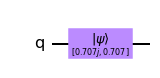

In [54]:
qc = QuantumCircuit(1) # Wir definieren qc neu
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw("mpl")

Dies sollte unser Qubit in dem Zustand initialisieren:

$$ |q\rangle = \tfrac{i}{\sqrt{2}}|0\rangle + \tfrac{1}{\sqrt{2}}|1\rangle $$

Wir können dies mit Hilfe des Simulators verifizieren:

In [55]:
state = execute(qc, backend).result().get_statevector()
print("Qubit State = " + str(state))

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


Wir sehen hier, dass das Qubit im Zustand `[0.+0.70710678j 0.70710678+0.j]` initialisiert ist, was der Zustand ist, den wir erwartet haben.

Lassen Sie uns nun dieses Qubit messen:

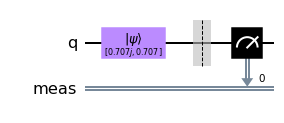

In [56]:
qc.measure_all()
qc.draw("mpl")

Wenn wir diese gesamte Schaltung simulieren, können wir sehen, dass eine der Amplituden _immer_ 0 ist:

In [57]:
state = execute(qc, backend).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+0.j 1.+0.j]


Sie können diese Zelle einige Male erneut ausführen, um das Qubit zu reinitialisieren und es erneut zu messen.
Sie werden feststellen, dass beide Ergebnisse gleich wahrscheinlich sind, aber dass der Zustand des Qubits niemals eine Superposition von $|0\rangle$ und $|1\rangle$ ist.
Interessanterweise bleibt die globale Phase auf dem Zustand $|0\rangle$ erhalten, aber da dies eine globale Phase ist, können wir sie nie auf einem realen Quantencomputer messen.

### Eine Anmerkung zu Quantensimulatoren

Wir sehen, dass das Aufschreiben des Zustands eines Qubits zwei komplexe Zahlen erfordert, aber wenn wir einen echten Quantencomputer verwenden, werden wir immer nur eine Ja-oder-Nein-Antwort (`0` oder `1`) für jedes Qubit erhalten. 
Die Ausgabe eines 10-Qubit-Quantencomputers sieht wie folgt aus:

`0110111110`

Nur 10 Bits, keine Überlagerung oder komplexe Amplituden.
Wenn wir einen echten Quantencomputer verwenden, können wir die Zustände unserer Qubits während der Berechnung nicht sehen, da dies sie zerstören würde! 
Dieses Verhalten ist nicht ideal zum Lernen, deshalb bietet Qiskit verschiedene Quantensimulatoren an: Der `qasm_simulator` verhält sich so, als ob Sie mit einem echten Quantencomputer interagieren würden, und erlaubt Ihnen nicht, `.get_statevector()` zu verwenden. 
Alternativ dazu erlaubt `statevector_simulator` (den wir in diesem Kapitel verwendet haben), die Quantenzustände vor der Messung zu betrachten, wie wir gesehen haben. 

## 3. Die Bloch-Kugel <a id="bloch-sphere"></a>
### 3.1. Beschreibung des eingeschränkten Qubit-Zustands <a id="bloch-sphere-1"></a>

Wir haben weiter oben in diesem Kapitel gesehen, dass der allgemeine Zustand eines Qubits ($|q\rangle$) ist:

$$ |q\rangle = \alpha|0\rangle + \beta|1\rangle $$

$$ \alpha, \beta \in \mathbb{C} $$

(Die zweite Zeile sagt uns, dass $\alpha$ und $\beta$ komplexe Zahlen sind). 
Die ersten beiden Implikationen in Abschnitt 2 sagen uns, dass wir zwischen einigen dieser Zustände nicht unterscheiden können. 
Das bedeutet, dass wir in unserer Beschreibung des Qubits spezifischer sein können. 

Erstens: 
Da wir die globale Phase nicht messen können, können wir nur die Phasendifferenz zwischen den Zuständen $|0\rangle$ und $|1\rangle$ messen. 
Anstatt $\alpha$ und $\beta$ komplex zu machen, können wir sie auf die reellen Zahlen beschränken und einen Term hinzufügen, der uns die relative Phase zwischen ihnen angibt:

$$ |q\rangle = \alpha|0\rangle + e^{i\phi}\beta|1\rangle $$

$$ \alpha, \beta, \phi \in \mathbb{R} $$

Da der Qubit-Zustand schließlich normalisiert werden muss, d.h.

$$ \sqrt{\alpha^2 + \beta^2} = 1 $$

können wir die trigonometrische Identität verwenden:

$$ \sqrt{\sin^2{x} + \cos^2{x}} = 1 $$

um die reellen $\alpha$ und $\beta$ in Form einer Variablen, $\theta$, zu beschreiben:

$$ \alpha = \cos{\tfrac{\theta}{2}}, \quad \beta=\sin{\tfrac{\theta}{2}} $$

Daraus können wir den Zustand eines beliebigen Qubits mit den beiden Variablen $\phi$ und $\theta$ beschreiben:

$$ \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

$$ \theta, \phi \in \mathbb{R} $$


### 3.2 Visuelle Darstellung eines Qubit-Zustands <a id="bloch-sphere-2"></a>

Wir wollen unseren allgemeinen Qubit-Zustand darstellen:

$$ |Qubit \rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle $$

Wenn wir $\theta$ und $\phi$ als Kugelkoordinaten interpretieren ($r = 1$, da der Betrag des Qubitzustands $1$ ist), können wir jeden einzelnen Qubitzustand auf der Oberfläche einer Kugel, der sogenannten _Bloch-Kugel, auftragen.

Unten haben wir ein Qubit im Zustand $|{+}\rangle$ eingezeichnet.
In diesem Fall ist $\theta = \pi/2$ und $\phi = 0$.

(Qiskit hat eine Funktion zum Plotten einer Blochkugel, `plot_bloch_vector()`, aber zum Zeitpunkt des Schreibens nimmt sie nur kartesische Koordinaten.
Wir haben eine Funktion eingefügt, die die Umwandlung automatisch vornimmt). 

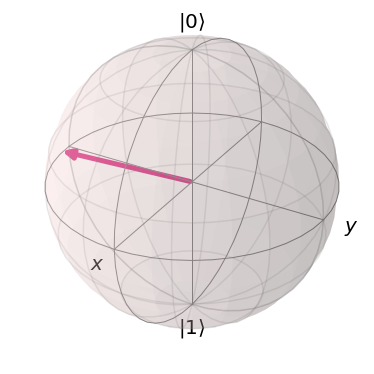

In [58]:
from qiskit.visualization import plot_bloch_vector
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector(coords) # Bloch-Vektor mit sphärischen Koordinaten

#### Warnung!
Wenn man zum ersten Mal etwas über Qubit-Zustände lernt, ist es leicht, den _Zustandsvektor_ des Qubits mit seinem _Bloch-Vektor_ zu verwechseln.
Denken Sie daran, dass der Zustandsvektor der in [1.1](#Anmerkung) beschriebene Vektor ist, der die Amplituden für die beiden Zustände enthält, in denen sich unser Qubit befinden kann. 
Der Bloch-Vektor ist ein Visualisierungswerkzeug, das den 2D-komplexen Zustandsvektor auf den realen 3D-Raum abbildet.

#### Schnell-Übung
Verwenden Sie `plot_bloch_vector()`, um ein Qubit in den Zuständen darzustellen:
1. $|0\rangle$
2. $|1\rangle$
3. $\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$
4. $\tfrac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)$
5. $\tfrac{1}{\sqrt{2}}\begin{bmatrix}i\\1\end{bmatrix}$

In [59]:
# Starten Sie hier!

## Copyright ##

In [60]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.4',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.11.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.23.5'}